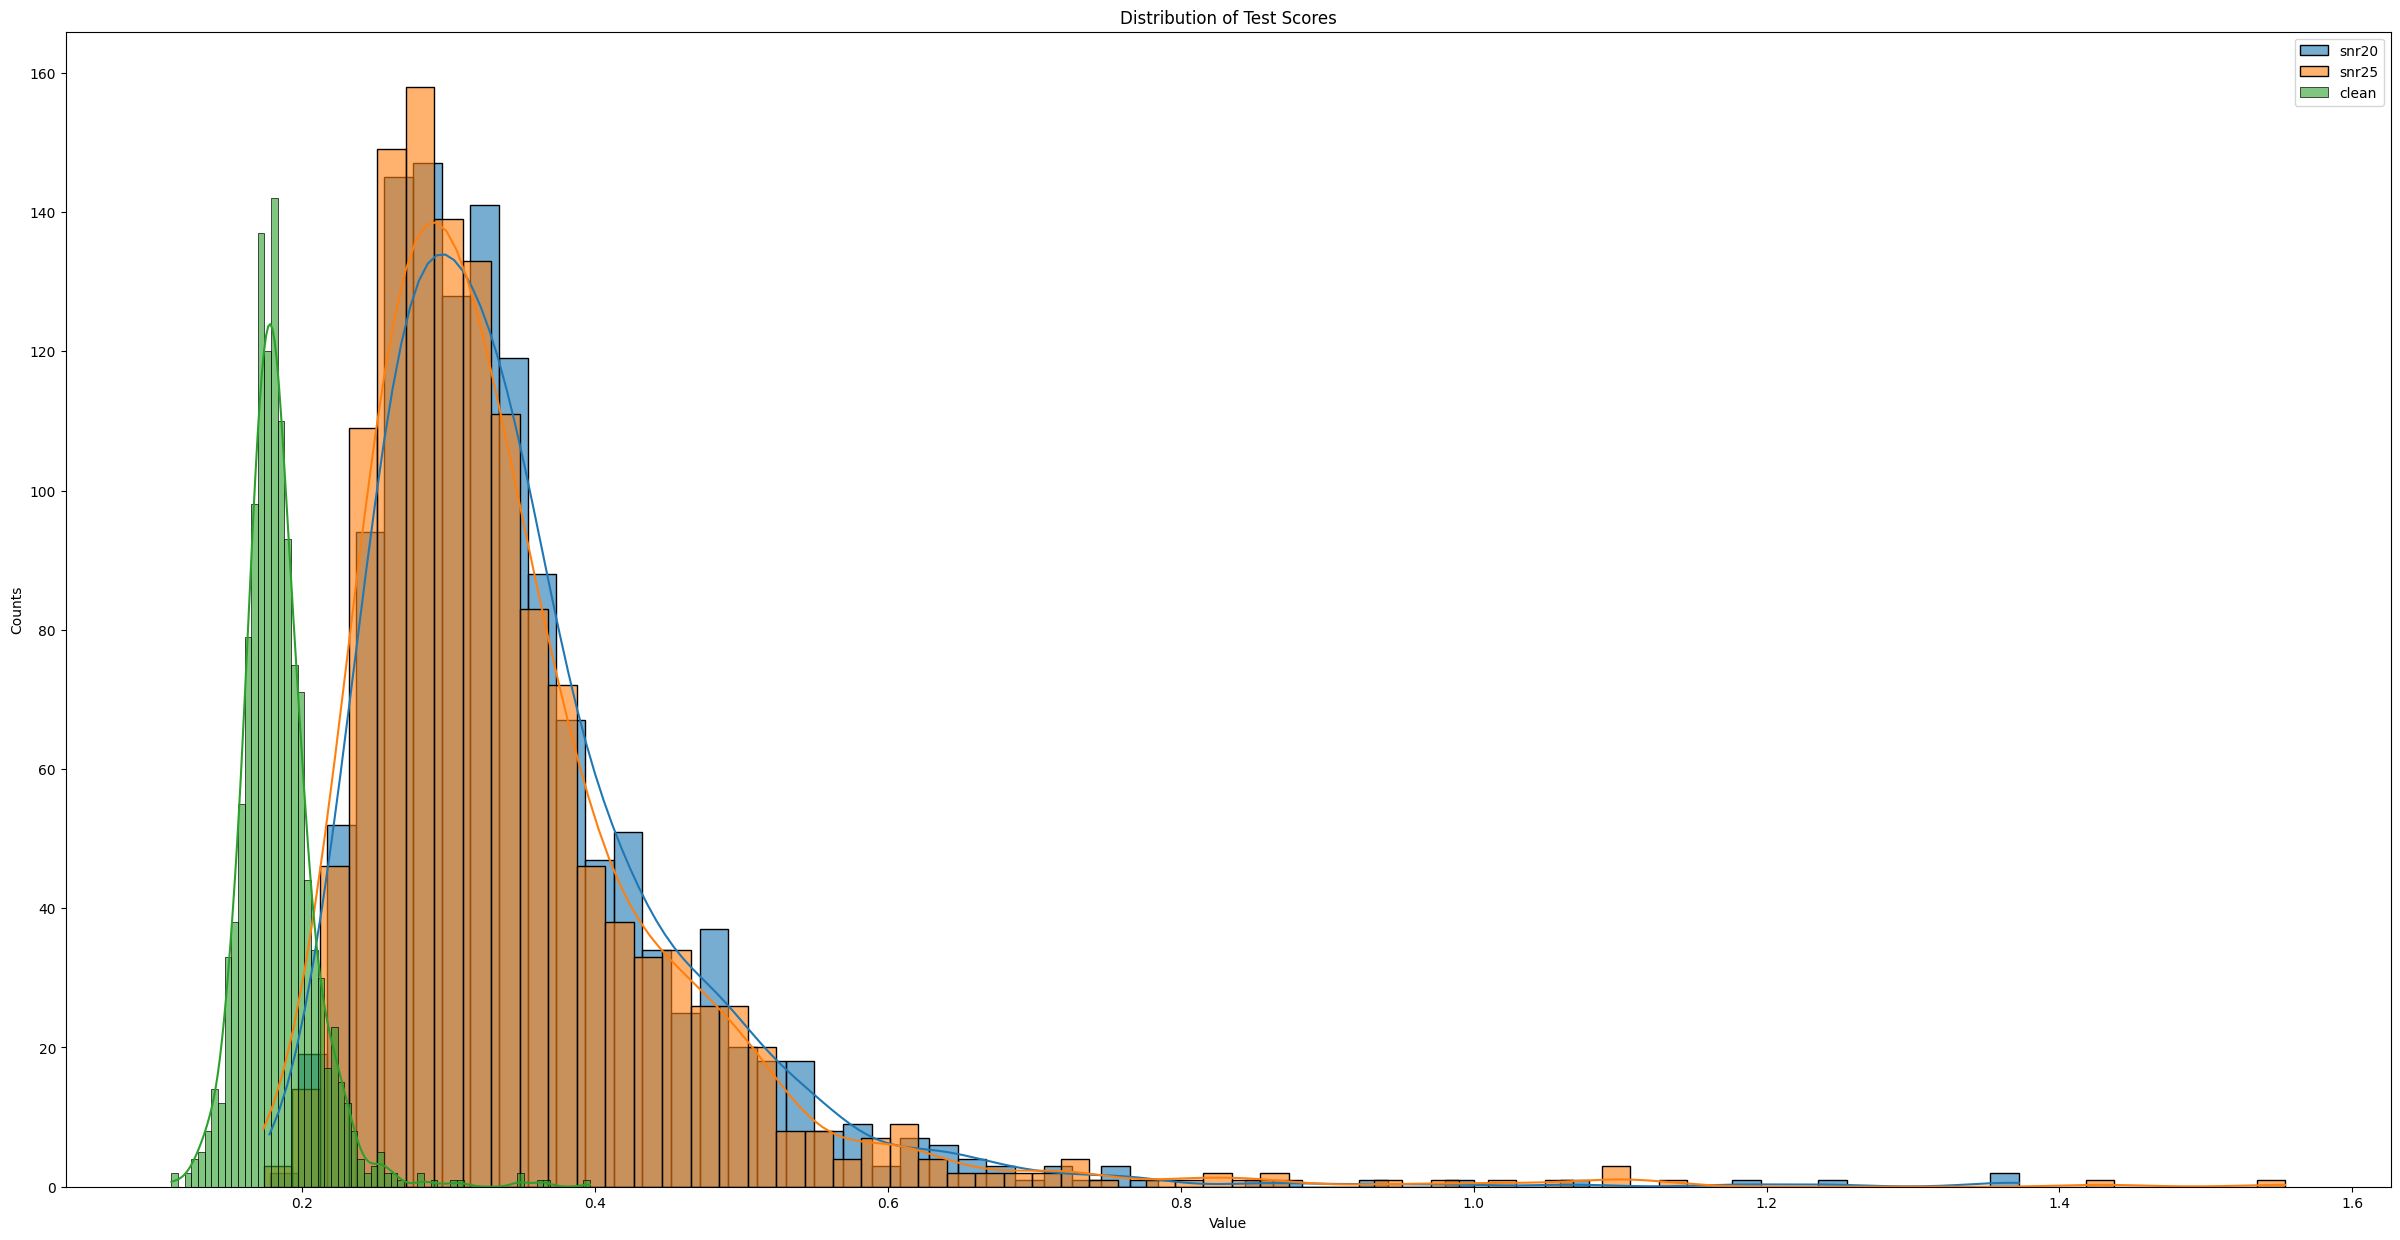

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

def process_json(json_file_path):
    with open(json_file_path, "r") as json_file:
        data = json.load(json_file)
    
    test_scores = data.get("test_scores", [])
    scores = [score for score, _ in test_scores]
    return scores

json_files = [
    ("./log/results_snr15.json", "snr15"),
    ("./log/results_snr20.json", "snr20"),
    ("./log/results_snr25.json", "snr25"),
    ("./log/results_clean.json", "clean"),
]

plt.figure(figsize=(30, 15))

for json_path, name in json_files:
    scores = process_json(json_path)
    sns.histplot(scores, kde=True, label=name, alpha=0.6)  # Use alpha to adjust transparency

plt.xlabel('Value')
plt.ylabel('Counts')
plt.title('Distribution of Test Scores')
plt.legend()
plt.show()
